# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

- There is a market for used cars. People prefer to buy used cars over new cars. Cars4U is tech start up entering this market.   

### **The objective:**

-  Come up with pricing model which can help Cars4U to grow and achieve profitablity. 

### **The key questions:**

-  What are the key features which impact the pricing model ? 
-  Does car manufacturing year impact the pricing model ? relatively new used cars get higher price ? 

### **The problem formulation**:

- Identity pattern across features like mileage, seats, kilometer driven how it affects the pricing model 
- Identify right model to correctly predict the price of used car 

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [634]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libaries to split the data, preprocessing and Linear regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



### **Let us load the data**

In [635]:
# load the data from csvc
data = pd.read_csv('used_cars.csv')

## Data Overview

- Observations
- Sanity checks

In [636]:
# First 5 rows of the data 
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [637]:
# last 5 rows of the data 
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [638]:
# Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [639]:
# Check for any null values 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [640]:
# Check for any duplicate rows 
data.duplicated().sum()

0

### ***Observations*** ###
 
1. Overall there are 7253 entries in the data with 14 columns 
2. There are data missing in few columns 
3. S.No. column doesnt provide any additional benefits since its acting as index column 
4. There are no duplicates in the data 
5. ***Categorical variables - Location, Year, Fuel_Type, Transmission, Owner_Type, Seats***
6. ***Numerical variables -  Kilometers_Driven, Mileage, Engine, Power***

***Price is the target variable***

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [593]:
# summary stats
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0


In [594]:
## Categorical variables 
categorical_variables=['Location','Fuel_Type','Transmission','Owner_Type']
for x in categorical_variables:
    print("Breakdown by category ===>",x)
    print(data[x].value_counts())

Breakdown by category ===> Location
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Breakdown by category ===> Fuel_Type
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Breakdown by category ===> Transmission
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
Breakdown by category ===> Owner_Type
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64


In [595]:
# Drop Sr no column 
data.drop('S.No.',axis=1, inplace=True)

In [596]:
# Based on summary stats kilometers_driven - max value for a car driven doesnt look right 
print("Max Kilometers_Driven ==> ", data['Kilometers_Driven'].max())
print("Min Kilometers_Driven ==> ", data['Kilometers_Driven'].min())
print("p90 of Kilometers_Driven ", data['Kilometers_Driven'].quantile(0.99))

Max Kilometers_Driven ==>  6500000
Min Kilometers_Driven ==>  171
p90 of Kilometers_Driven  173479.99999999956


In [597]:
# Dropping data which is more than p99 for kilometers_driven
data.drop(data[data['Kilometers_Driven'] > data['Kilometers_Driven'].quantile(0.99)].index, inplace=True)

In [598]:
# Based on summary stats mileage for car cannot be zero
print("Min Mileage ==> ", data['Mileage'].min())
data.drop(data[data['Mileage'] == data['Mileage'].min()].index, inplace=True)

Min Mileage ==>  0.0


In [599]:
# Post data clean up for unrealistic values 
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7102,1994,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7102,11,Mumbai,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7102.0,NaN,NaN,NaN,2013.439172,3.188382,1996.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,7102.0,NaN,NaN,NaN,55854.742044,30631.471195,171.0,33552.5,52950.5,72006.0,173000.0
Fuel_Type,7102,5,Diesel,3761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7102,2,Manual,5087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7102,4,First,5853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7100.0,NaN,NaN,NaN,18.373182,4.148653,6.4,15.4,18.3,21.1,33.54
Engine,7069.0,NaN,NaN,NaN,1611.381242,591.384385,72.0,1198.0,1493.0,1968.0,5998.0
Power,6974.0,NaN,NaN,NaN,112.695475,53.578142,34.2,75.0,93.85,138.1,616.0


### ***Observations*** ### 

1. Name has lot of unique values which wont help in model building 
2. Location has 11 unqiue values with Mumbai with highest car sold 
3. Diesel and petrol fuel types of car are sold more. 
4. First owner cars are high in the given data set 
5. Five seater cars are high 

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

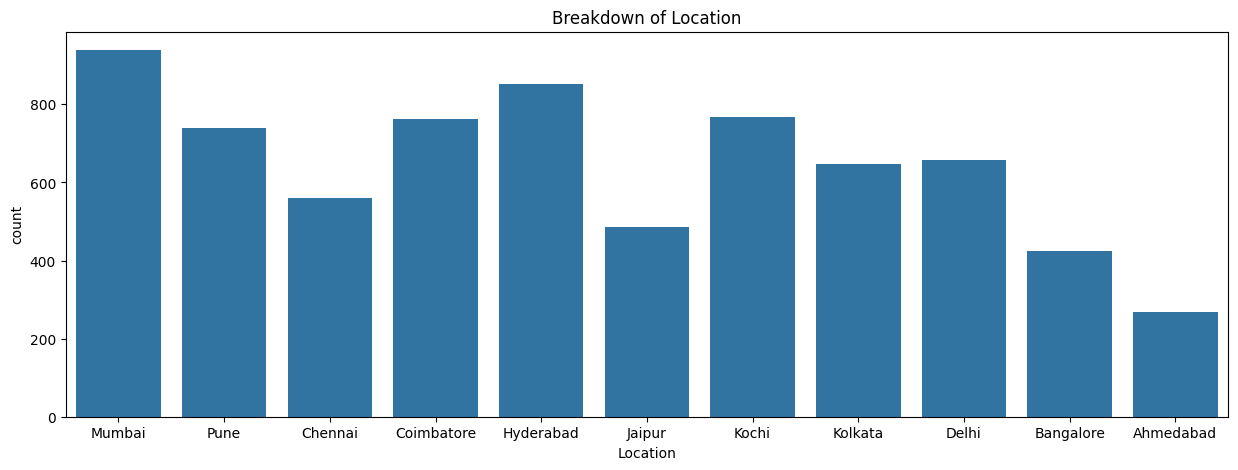

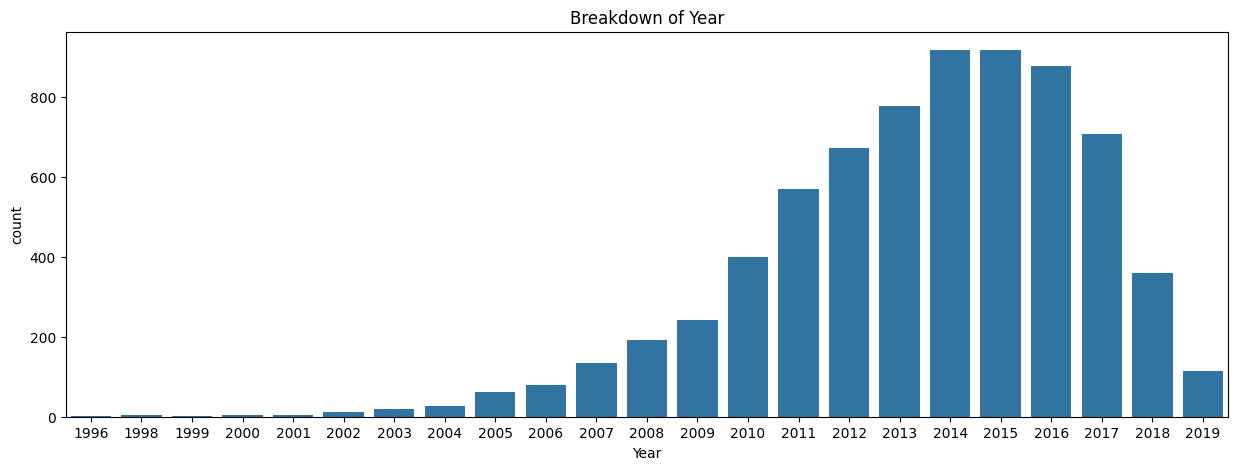

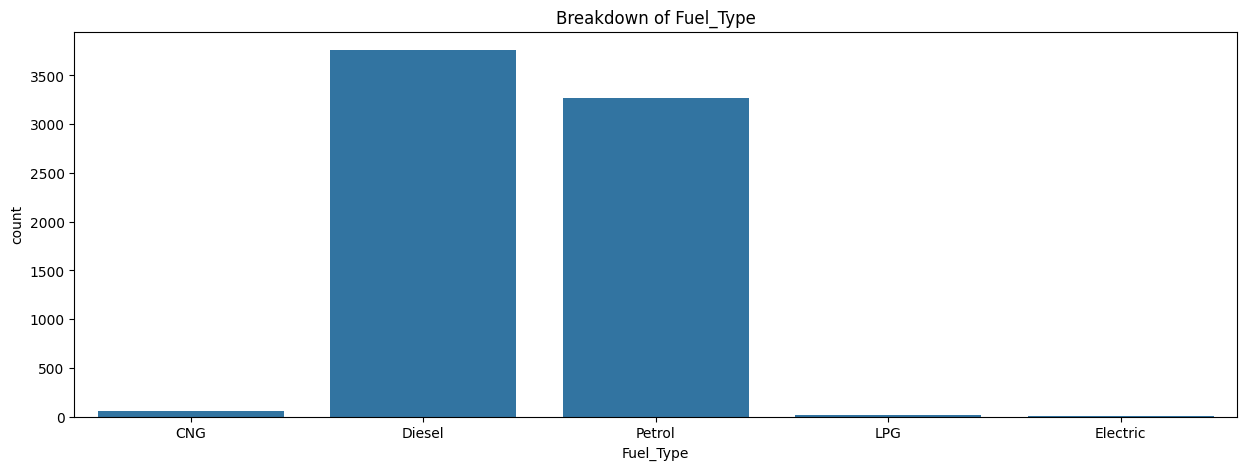

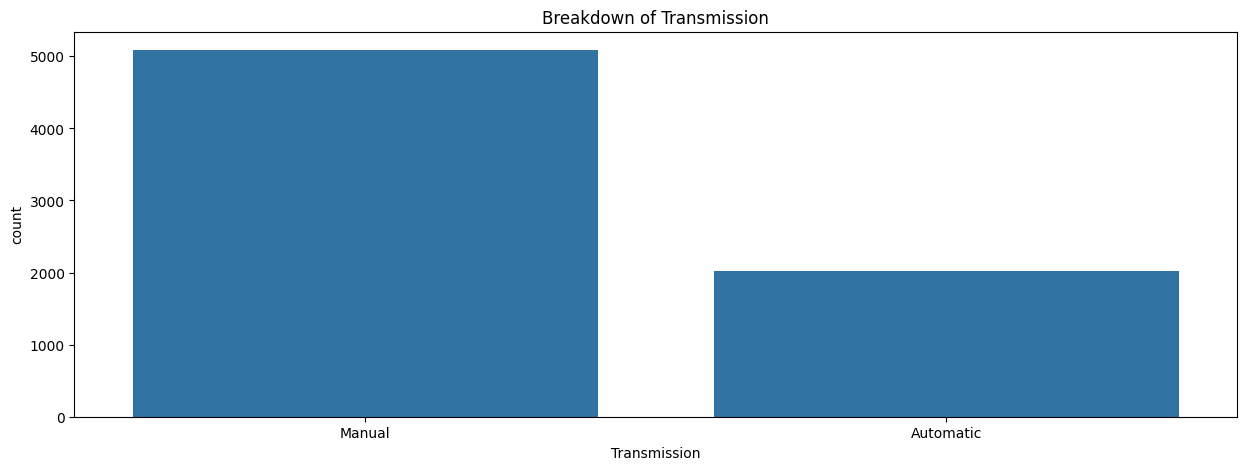

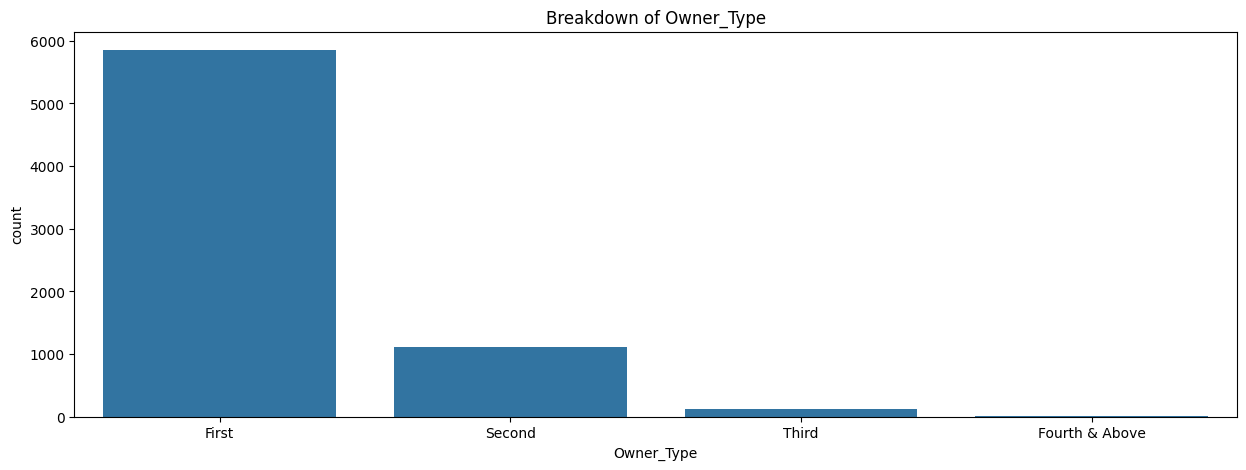

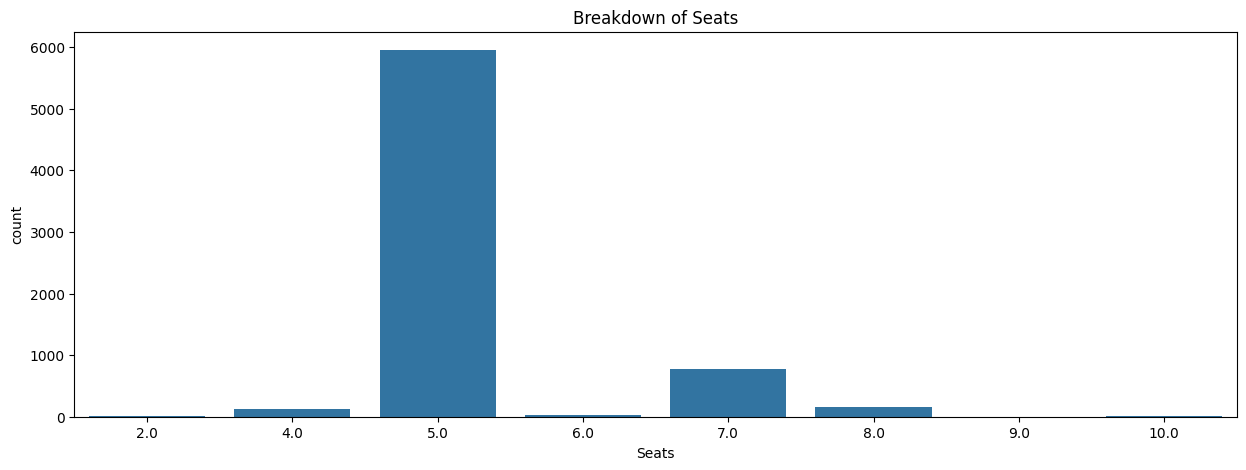

In [600]:
categorical_variables = ['Location','Year','Fuel_Type','Transmission','Owner_Type','Seats']
for col in categorical_variables:
    plt.figure(figsize=(15,5))
    sns.countplot(x=col, data=data)
    plt.title(f'Breakdown of {col}')
    plt.show()

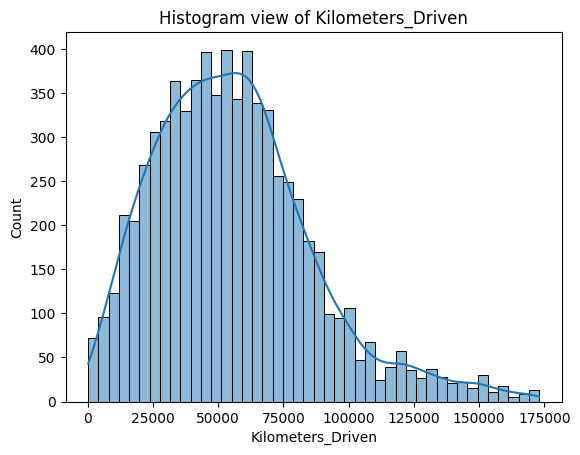

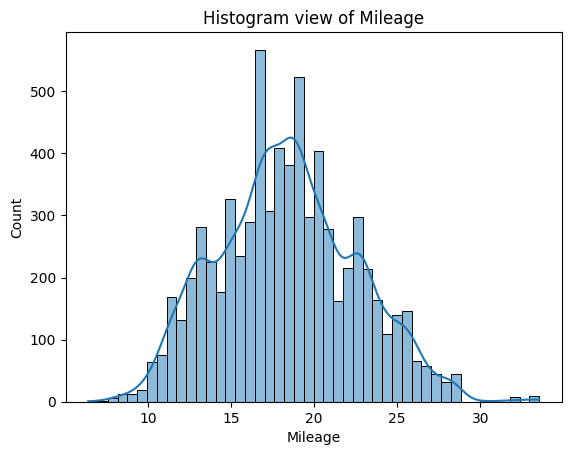

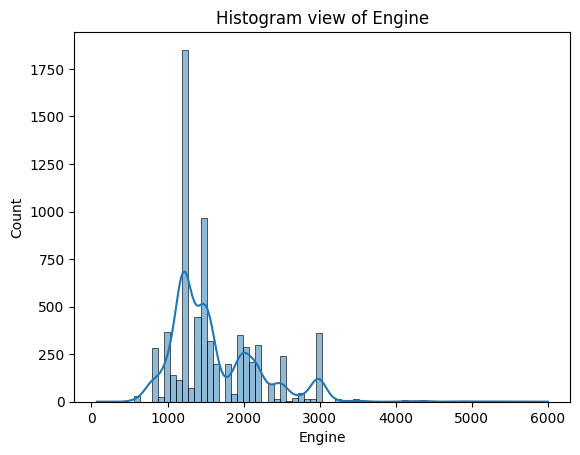

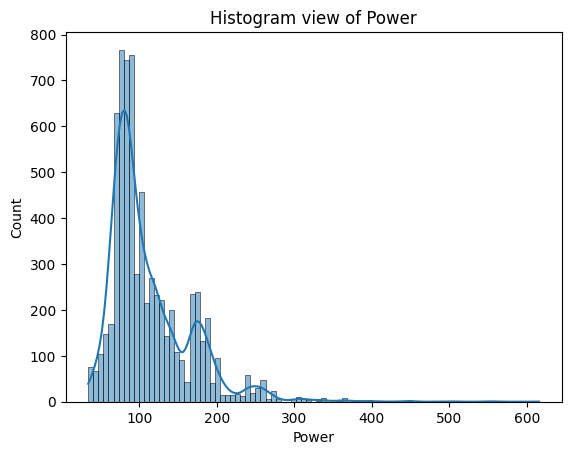

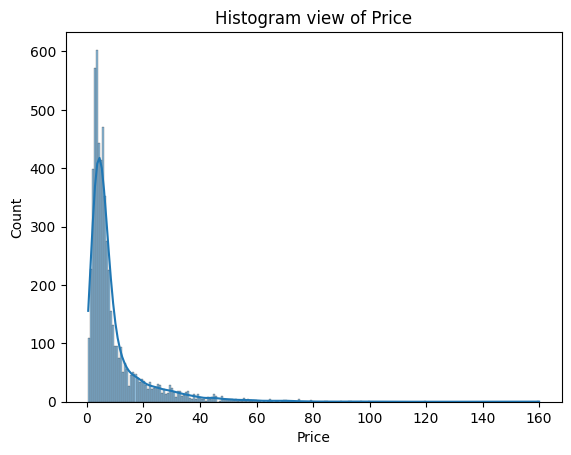

In [601]:
numerical_variables=['Kilometers_Driven','Mileage','Engine','Power','Price']
for col in numerical_variables:
    plt.title(f"Histogram view of {col}")
    sns.histplot(x=col,kde=True,data=data)
    plt.show()

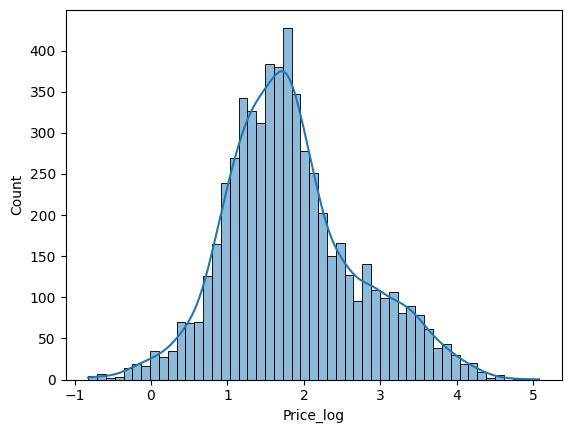

In [602]:
# Price data is skewed Applying log transformation 
data['Price_log'] = np.log(data["Price"])
sns.histplot(x='Price_log',kde=True,data=data)
plt.show()

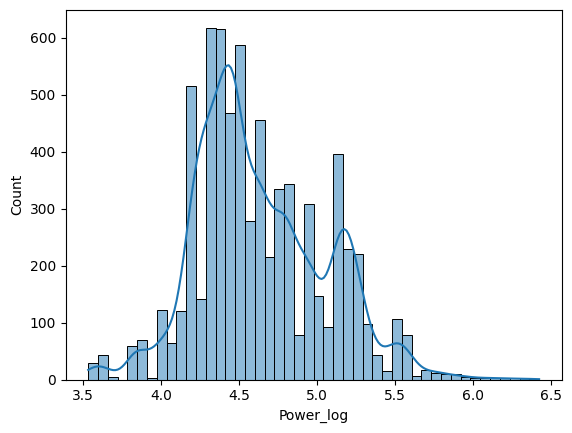

In [603]:
# Power is skewed applying log transformation 
data['Power_log'] = np.log(data["Power"])
sns.histplot(x='Power_log',kde=True,data=data)
plt.show()

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

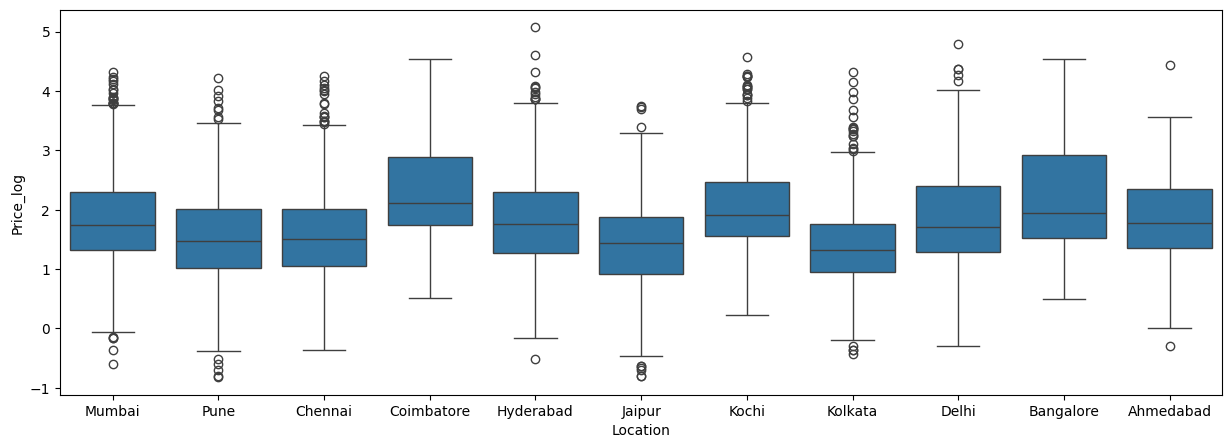

In [604]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='Location', y='Price_log')
plt.xlabel('Location')
plt.ylabel('Price_log')
plt.show()

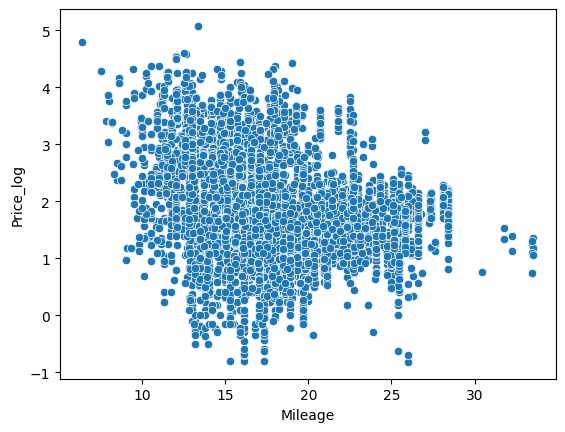

In [605]:
sns.scatterplot(data=data, x='Mileage', y='Price_log')
plt.xlabel('Mileage')
plt.ylabel('Price_log')
plt.show()

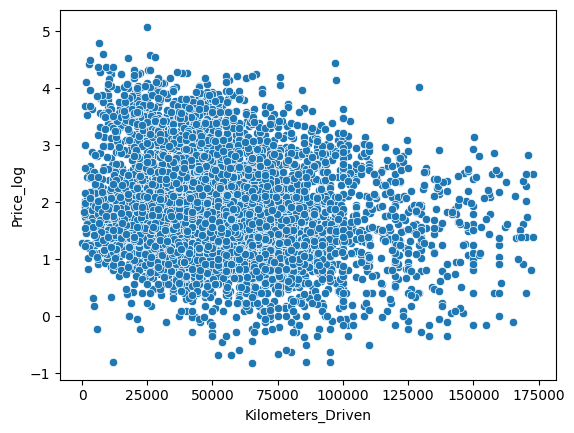

In [606]:
sns.scatterplot(data=data, x='Kilometers_Driven', y='Price_log')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price_log')
plt.show()

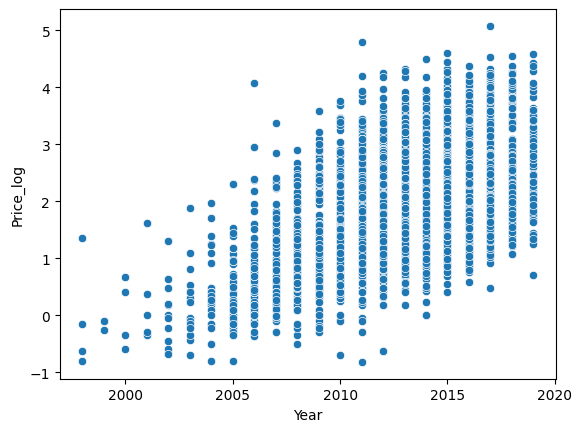

In [607]:
sns.scatterplot(data=data, x='Year', y='Price_log')
plt.xlabel('Year')
plt.ylabel('Price_log')
plt.show()

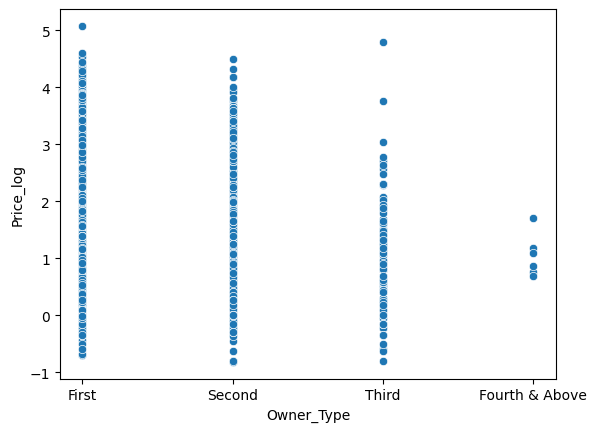

In [608]:
sns.scatterplot(data=data, x='Owner_Type', y='Price_log')
plt.xlabel('Owner_Type')
plt.ylabel('Price_log')
plt.show()

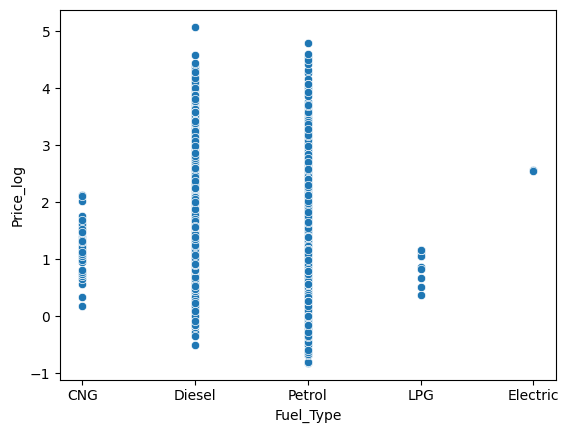

In [609]:
sns.scatterplot(data=data, x='Fuel_Type', y='Price_log')
plt.xlabel('Fuel_Type')
plt.ylabel('Price_log')
plt.show()

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [610]:
data['brand'] = data['Name'].str.split().str[0]

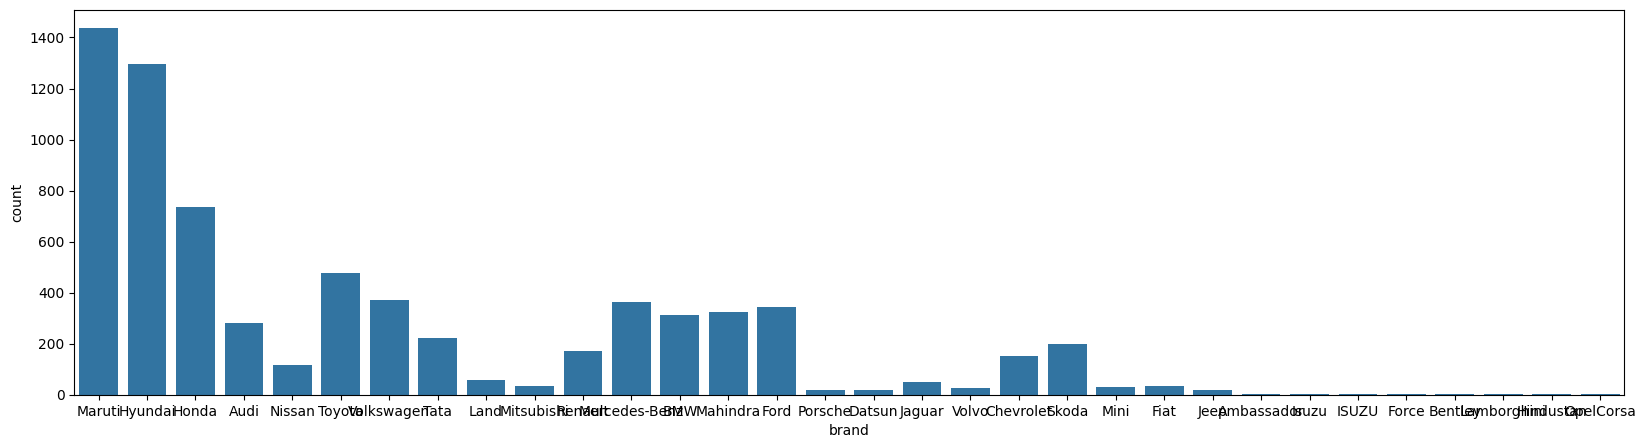

In [611]:
plt.figure(figsize=(20,5))
sns.countplot(x='brand',data=data)
plt.show()

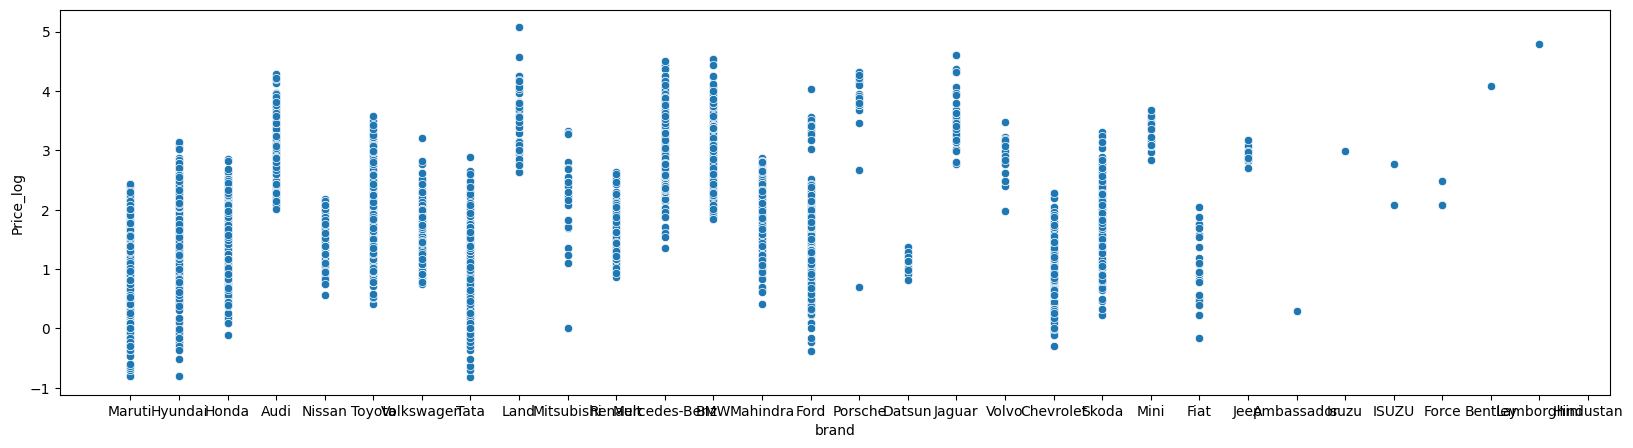

In [612]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=data, x='brand', y='Price_log')
plt.xlabel('brand')
plt.ylabel('Price_log')
plt.show()

### **Missing value treatment**

In [613]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 33
Power                 128
Seats                  38
New_price            6101
Price                1207
Price_log            1207
Power_log             128
brand                   0
dtype: int64

In [614]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Price_log,Power_log,brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,2.564949,3.713572,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,2.545531,4.290459,Toyota


In [615]:
data=data.dropna(subset=['Mileage'])

In [616]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Price_log,Power_log,brand
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,0.746688,NaN,Maruti
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,0.559616,NaN,Maruti
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,1.163151,NaN,Honda
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,1.757858,NaN,Maruti
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,3.15,1.147402,NaN,Maruti
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,NaN,NaN,NaN,NaN,2.95,1.081805,NaN,Toyota
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,4.70,1.547563,NaN,Maruti
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10,NaN,NaN,NaN,NaN,1.75,0.559616,NaN,Maruti
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,NaN,17.89,2.884242,NaN,BMW
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,NaN,18.00,2.890372,NaN,BMW


In [617]:
data=data.dropna(subset=['Engine'])

In [618]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Price_log,Power_log,brand
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,NaN,1.70,0.530628,4.60517,Honda
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,0.405465,NaN,Maruti
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,NaN,NaN,NaN,7.00,1.945910,NaN,Ford
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,0.916291,NaN,Maruti
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,0.559616,NaN,Maruti


In [619]:
data=data.dropna(subset=['Seats'])

In [620]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  91
Seats                   0
New_price            6062
Price                1198
Price_log            1198
Power_log              91
brand                   0
dtype: int64

In [621]:
data=data.dropna(subset=['Power'])

In [622]:
data=data.dropna(subset=['Price'])

In [623]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price            4972
Price                   0
Price_log               0
Power_log               0
brand                   0
dtype: int64

In [624]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5790,1791,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5790,11,Mumbai,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5790.0,NaN,NaN,NaN,2013.511054,3.14554,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5790.0,NaN,NaN,NaN,55417.83057,30424.137536,171.0,33004.0,52041.5,72000.0,173000.0
Fuel_Type,5790,4,Diesel,3089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5790,2,Manual,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5790,4,First,4784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5790.0,NaN,NaN,NaN,18.395133,4.180695,6.4,15.4,18.485,21.1,33.54
Engine,5790.0,NaN,NaN,NaN,1618.321244,597.430616,624.0,1198.0,1493.0,1968.0,5998.0
Power,5790.0,NaN,NaN,NaN,113.133965,53.929571,34.2,75.0,94.0,138.1,560.0


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [625]:
	
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5790 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5790 non-null   object 
 1   Location           5790 non-null   object 
 2   Year               5790 non-null   int64  
 3   Kilometers_Driven  5790 non-null   int64  
 4   Fuel_Type          5790 non-null   object 
 5   Transmission       5790 non-null   object 
 6   Owner_Type         5790 non-null   object 
 7   Mileage            5790 non-null   float64
 8   Engine             5790 non-null   float64
 9   Power              5790 non-null   float64
 10  Seats              5790 non-null   float64
 11  New_price          818 non-null    float64
 12  Price              5790 non-null   float64
 13  Price_log          5790 non-null   float64
 14  Power_log          5790 non-null   float64
 15  brand              5790 non-null   object 
dtypes: float64(8), int64(2), obje

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [626]:
# Drop unnecessary columns
X = data.drop(columns=['Name', 'Price', 'Price_log', 'New_price', 'Kilometers_Driven'], axis=1)

# Target variable
Y = data[["Price_log", "Price"]]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand'])

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Shapes of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4053, 52) (1737, 52) (4053, 2) (1737, 2)


In [627]:
from sklearn import metrics

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

In [628]:
# Apply Liner Regression  
lr = LinearRegression()
lr.fit(X_train, y_train['Price_log'])
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8927337100627996
R-square on test set :  0.8686707081549242
RMSE on training set :  3.6796749897624172
RMSE on test set :  4.033799589204056


In [629]:
# Apply Ridge Regression 

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train['Price_log'])
Ridge_score=get_model_score(ridge)


# Apply Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train['Price_log'])
Lasso_score=get_model_score(lasso)



R-sqaure on training set :  0.886401325008267
R-square on test set :  0.8727063223400978
RMSE on training set :  3.7867310782740122
RMSE on test set :  3.9713387477102913
R-sqaure on training set :  -2.8242837918042687
R-square on test set :  0.008393369256015304
RMSE on training set :  21.97115497924392
RMSE on test set :  11.0841712569543


In [630]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train['Price_log'])
get_model_score(dt)

R-sqaure on training set :  0.9989824125816772
R-square on test set :  0.8560193727430603
RMSE on training set :  0.3583964468368281
RMSE on test set :  4.223626896074068


[0.9989824125816772, 0.8560193727430603, 0.3583964468368281, 4.223626896074068]

In [631]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train['Price_log'])
get_model_score(rf)

R-sqaure on training set :  0.9743240282098484
R-square on test set :  0.9005789289734195
RMSE on training set :  1.800285054117539
RMSE on test set :  3.5097221361670954


[0.9743240282098484, 0.9005789289734195, 1.800285054117539, 3.5097221361670954]

### **Hyperparameter Tuning: Decision Tree**

In [632]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train Decision Tree Regressor with best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)
dt_train_rmse = mean_squared_error(y_train, dt_train_pred, squared=False)
dt_test_rmse = mean_squared_error(y_test, dt_test_pred, squared=False)

print("Decision Tree Regression Train RMSE:", dt_train_rmse)
print("Decision Tree Regression Test RMSE:", dt_test_rmse)

# Feature importance
feature_importances = pd.DataFrame(best_dt.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Decision Tree Regression Train RMSE: 1.7393357701462528
Decision Tree Regression Test RMSE: 2.16665560398952
Feature Importances:
                            importance
Power                        0.659734
Year                         0.185241
Engine                       0.053439
Power_log                    0.045690
Mileage                      0.016884
Location_Hyderabad           0.015308
Transmission_Manual          0.008940
brand_Mini                   0.003107
brand_Audi                   0.002825
Owner_Type_Second            0.001943
brand_BMW                    0.001409
brand_Mercedes-Benz          0.001131
Location_Bangalore           0.000916
Location_Coimbatore          0.000760
brand_Honda                  0.000628
Location_Kolkata             0.000443
Fuel_Type_Diesel             0.000323
Location_Mumbai              0.000261
brand_Tata                   0.000208
Se

**Feature Importance**

### **Hyperparameter Tuning: Random Forest**

**Feature Importance**

In [633]:
# Model Scores 

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?